In [1]:
"""
v1.0

This piece is attempting to normalize on the whole market
20200424 - I realized after Covid 19 that major indexes like the S&P 500 are just indexes of overall uncertainty
    the bulls have claimed their prices and the bears have claimed their prices and the only times people will 
        pull their money out of the market entirely is when they don't know somewherre better to put it
"""

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [4]:
sp500 = yf.Ticker("^GSPC")

sp500.info

{'previousClose': 2447.33,
 'regularMarketOpen': 2457.77,
 'twoHundredDayAverage': 3078.44,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 2571.42,
 'navPrice': None,
 'averageDailyVolume10Day': 8119535714,
 'totalAssets': None,
 'regularMarketPreviousClose': 2447.33,
 'fiftyDayAverage': 2986.1248,
 'trailingAnnualDividendRate': None,
 'open': 2457.77,
 'toCurrency': None,
 'averageVolume10days': 8119535714,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 2407.53,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 586234103,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 4904042131,
 'priceToSalesTrailing12Months': None,
 'dayLow': 2407.53,
 'ask': 2750.57,
 'ytdReturn': 

In [5]:
df = sp500.history(period='max').reset_index()

altered_df = sp500.history(period='max').reset_index()

In [6]:
# i need to figure out what is important for technical analysis
# prior six months

# is it more useful to keep it as the multiplier or subtract one to represent growth
# it depends on how i'd like to use it

altered_df['priorDayBW'] = df.Open/df.Open.shift(1)-1
altered_df['priorWeekBW'] = df.Open/df.Open.shift(5)-1
altered_df['priorMonthBW'] = df.Open/df.Open.shift(21)-1
altered_df['prior3MonthsBW'] = df.Open/df.Open.shift(63)-1
altered_df['prior6monthsBW'] = df.Open/df.Open.shift(126)-1
altered_df['priorYearBW'] = df.Open/df.Open.shift(253)-1
altered_df['prior2YearBW'] = df.Open/df.Open.shift(506)-1
altered_df['prior3YearBW'] = df.Open/df.Open.shift(759)-1
altered_df['prior4YearBW'] = df.Open/df.Open.shift(1012)-1
altered_df['prior5YearBW'] = df.Open/df.Open.shift(1265)-1
altered_df['prior8YearBW'] = df.Open/df.Open.shift(2024)-1
altered_df['prior10YearBW'] = df.Open/df.Open.shift(2530)-1
altered_df['prior15YearBW'] = df.Open/df.Open.shift(3795)-1
altered_df['prior20YearBW'] = df.Open/df.Open.shift(5060)-1

In [7]:
for i in range(0,126):
    s = 'Open'+str(i+1)+'TDAgo'
    altered_df[s] = df.Open.shift(i)
    

In [8]:
# pd.set_option('display.max_rows', altered_df.shape[0]+1)

# display max columns
altered_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,priorDayBW,priorWeekBW,...,Open117TDAgo,Open118TDAgo,Open119TDAgo,Open120TDAgo,Open121TDAgo,Open122TDAgo,Open123TDAgo,Open124TDAgo,Open125TDAgo,Open126TDAgo
0,1927-12-30,17.66,17.66,17.66,17.66,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928-01-03,17.76,17.76,17.76,17.76,0,0,0,0.005663,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1928-01-04,17.72,17.72,17.72,17.72,0,0,0,-0.002252,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1928-01-05,17.55,17.55,17.55,17.55,0,0,0,-0.009594,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1928-01-06,17.66,17.66,17.66,17.66,0,0,0,0.006268,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162,2020-03-19,2393.48,2466.97,2319.78,2409.39,7946710000,0,0,-0.017656,-0.090229,...,2924.78,2983.69,2967.07,2985.47,2985.73,2968.35,3002.43,2983.50,3008.42,3010.36
23163,2020-03-20,2431.94,2453.01,2295.56,2304.92,9044690000,0,0,0.016069,-0.053716,...,2885.38,2924.78,2983.69,2967.07,2985.47,2985.73,2968.35,3002.43,2983.50,3008.42
23164,2020-03-23,2290.71,2300.73,2191.86,2237.40,7402180000,0,0,-0.058073,-0.086854,...,2918.56,2885.38,2924.78,2983.69,2967.07,2985.47,2985.73,2968.35,3002.43,2983.50
23165,2020-03-24,2344.44,2449.71,2344.44,2447.33,7547350000,0,0,0.023456,-0.033484,...,2944.23,2918.56,2885.38,2924.78,2983.69,2967.07,2985.47,2985.73,2968.35,3002.43


In [9]:
# i could run an analysis for each day and determine the strength of influence for each of the different to see if it changes
# if it does change, then I could determine which are the most consistently important
# if it doesnt change then I know which dimensions are the most influential



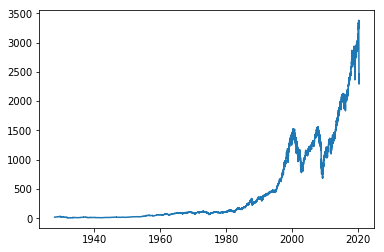

In [10]:
plt.plot(df.Date, df.Open)
plt.show()

In [11]:
fig = figure(num=None, figsize=(16, 12), dpi=160, facecolor='w', edgecolor='k')

<Figure size 2560x1920 with 0 Axes>

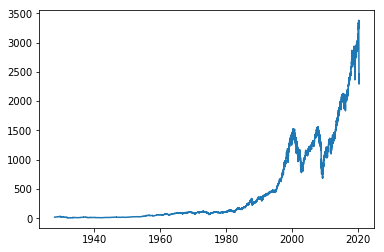

In [12]:
plt.plot(df.Date, df.Open)
plt.show()

In [13]:
fig.set_figheight(5)
fig.set_figwidth(5)

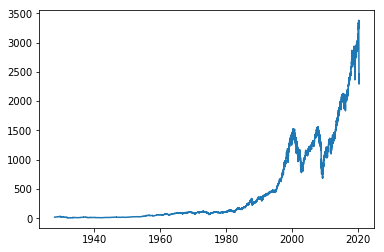

In [14]:
plt.plot(df.Date, df.Open)
plt.show()

In [15]:
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30,17.66,17.66,17.66,17.66,0,0,0
1,1928-01-03,17.76,17.76,17.76,17.76,0,0,0
2,1928-01-04,17.72,17.72,17.72,17.72,0,0,0
3,1928-01-05,17.55,17.55,17.55,17.55,0,0,0
4,1928-01-06,17.66,17.66,17.66,17.66,0,0,0
...,...,...,...,...,...,...,...,...
23162,2020-03-19,2393.48,2466.97,2319.78,2409.39,7946710000,0,0
23163,2020-03-20,2431.94,2453.01,2295.56,2304.92,9044690000,0,0
23164,2020-03-23,2290.71,2300.73,2191.86,2237.40,7402180000,0,0
23165,2020-03-24,2344.44,2449.71,2344.44,2447.33,7547350000,0,0


In [16]:
df['days_since'] = (df.Date - pd.to_datetime('1927-12-30') ).astype('timedelta64[D]')
df['log_Open'] = np.log1p(df.Open)

In [17]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,days_since,log_Open
0,1927-12-30,17.66,17.66,17.66,17.66,0,0,0,0.0,2.926382
1,1928-01-03,17.76,17.76,17.76,17.76,0,0,0,4.0,2.931727
2,1928-01-04,17.72,17.72,17.72,17.72,0,0,0,5.0,2.929592
3,1928-01-05,17.55,17.55,17.55,17.55,0,0,0,6.0,2.920470
4,1928-01-06,17.66,17.66,17.66,17.66,0,0,0,7.0,2.926382
...,...,...,...,...,...,...,...,...,...,...
23162,2020-03-19,2393.48,2466.97,2319.78,2409.39,7946710000,0,0,33683.0,7.780921
23163,2020-03-20,2431.94,2453.01,2295.56,2304.92,9044690000,0,0,33684.0,7.796856
23164,2020-03-23,2290.71,2300.73,2191.86,2237.40,7402180000,0,0,33687.0,7.737054
23165,2020-03-24,2344.44,2449.71,2344.44,2447.33,7547350000,0,0,33688.0,7.760228


In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.days_since, 
                                                               df.log_Open)
slope, intercept

(0.00017653011086167302, 1.872065658478662)

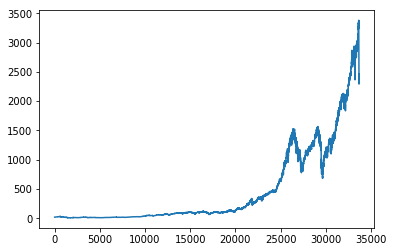

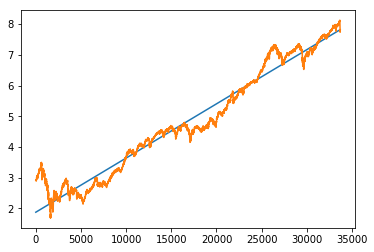

In [19]:
plt.plot(df.days_since, df.Open)
plt.show()

x = np.linspace(0, 33689, 1000)

plt.plot(x, slope*x+intercept)
plt.plot(df.days_since, df.log_Open)
plt.show()